In [1]:
# Project 3: Customer Review Sentiment Analysis
# ============================================

# 1️⃣ Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud 

# For text processing
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# 2️⃣ Load dataset
df = pd.read_csv("../data/tripadvisor_hotel_reviews.csv")
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


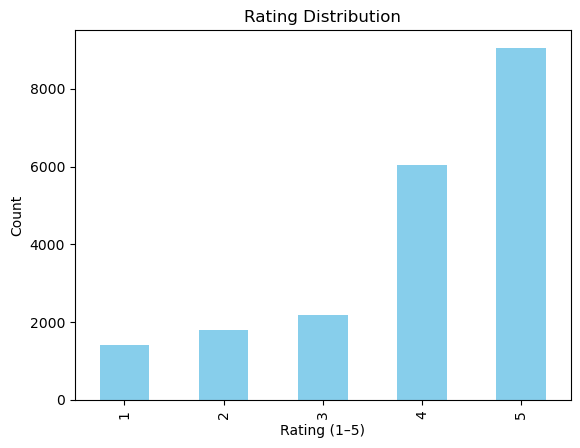

In [3]:
# 3️⃣ Basic exploration
df.info()
df['Rating'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title("Rating Distribution")
plt.xlabel("Rating (1–5)")
plt.ylabel("Count")
plt.show()

In [4]:
# 4️⃣ Create sentiment column
df = df[df['Rating'] != 3]  # Drop neutral
df['Sentiment'] = df['Rating'].apply(lambda x: 1 if x > 3 else 0)
df['Sentiment'].value_counts()

Sentiment
1    15093
0     3214
Name: count, dtype: int64

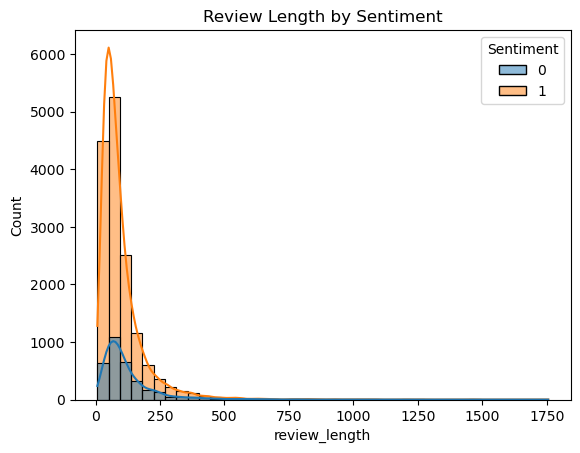

In [5]:
# 5️⃣ Quick text length check
df['review_length'] = df['Review'].apply(lambda x: len(x.split()))
sns.histplot(data=df, x='review_length', hue='Sentiment', bins=40, kde=True)
plt.title("Review Length by Sentiment")
plt.show()

In [ ]:
# 6️⃣ Word Clouds
pos_text = " ".join(df[df['Sentiment'] == 1]['Review'])
neg_text = " ".join(df[df['Sentiment'] == 0]['Review'])

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(WordCloud(width=400, height=300, background_color="white").generate(pos_text))
plt.title("Positive Reviews")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(WordCloud(width=400, height=300, background_color="white").generate(neg_text))
plt.title("Negative Reviews")
plt.axis("off")
plt.show()

In [ ]:
# 7️⃣ TF-IDF and Model Training
X_train, X_test, y_train, y_test = train_test_split(df['Review'], df['Sentiment'], test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)

In [ ]:
# Get feature names and coefficients
feature_names = vectorizer.get_feature_names_out()
coefficients = model.coef_[0]

# Create DataFrame for visualization
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sort by coefficient value
top_positive = coef_df.sort_values(by='Coefficient', ascending=False).head(10)
top_negative = coef_df.sort_values(by='Coefficient', ascending=True).head(10)

# Display results
print(" Top Positive Words:")
display(top_positive)

print("\n Top Negative Words:")
display(top_negative)


In [ ]:
# Top 10 Positive and Top 10 Negative Words
# Set style
sns.set(style="whitegrid", context="talk")

# Create the figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot positive words
sns.barplot(
    y="Feature", x="Coefficient",
    data=top_positive.sort_values(by="Coefficient", ascending=True),
    hue="Feature", palette="Greens_r", legend=False, ax=axes[0]
)
axes[0].set_title("Top 10 Positive Words", fontsize=14)
axes[0].set_xlabel("Coefficient (Importance)")
axes[0].set_ylabel("Word")

# Plot negative words
sns.barplot(
    y="Feature", x="Coefficient",
    data=top_negative.sort_values(by="Coefficient", ascending=False),
    hue="Feature", palette="Reds", legend=False, ax=axes[1]
)
axes[1].set_title("Top 10 Negative Words", fontsize=14)
axes[1].set_xlabel("Coefficient (Importance)")
axes[1].set_ylabel("")

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
# 8️⃣ Evaluation
y_pred = model.predict(X_test_vec)
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

### Interpretation of the evaluation metrics
| Metric |	Meaning	| Interpretation |
|--------|----------|----------------|
|**Precision (0 = 0.94, 1 = 0.95)** |	Of all predicted negative or positive reviews, how many were actually correct?|	The model makes very few false predictions for both classes — very precise.|
|**Recall (0 = 0.75, 1 = 0.99)** |	Of all actual negatives or positives, how many did the model detect? |	The model finds almost all positive reviews correctly, but misses some negative ones (0.75 recall). |
|**F1-Score** |	The balance between precision and recall. |	0.83 for negative reviews (ok), 0.97 for positive (excellent). |
|**Accuracy = 0.95** |	Overall correct predictions. |	Great overall accuracy. |

### In words:
The model is extremely good at recognizing positive reviews but not quite as strong at detecting negative ones.

##  Project 3 Summary — Customer Review Sentiment Analysis

###  Objective  
Analyze **TripAdvisor customer reviews** to classify sentiments as **positive** or **negative**, and uncover key themes driving customer satisfaction or dissatisfaction.

---

###  Methodology  
1. **Data Preprocessing:**  
   - Cleaned text data by removing punctuation, converting to lowercase, and filtering stopwords.  
   - Created a binary sentiment label (1 = positive, 0 = negative).  

2. **Feature Engineering (TF-IDF):**  
   - Used *Term Frequency–Inverse Document Frequency* to transform text into numerical features.  
   - Captured the most informative words for sentiment classification.  

3. **Model Training (Logistic Regression):**  
   - Trained a Logistic Regression classifier to predict review sentiment.  
   - Extracted **top positive and negative words** based on model coefficients.

4. **Evaluation:**  
   - Achieved **95% accuracy** with strong precision and recall, especially for positive reviews.  
   - Model performs best at identifying *positive feedback*, with slight room for improvement on *negative detection*.

---

###  Model Interpretation  

| Metric | Meaning | Result | Interpretation |
|--------|----------|---------|----------------|
| **Precision (Positive)** | Accuracy of positive predictions | 0.95 | The model rarely mislabels negative reviews as positive. |
| **Recall (Positive)** | % of actual positives correctly found | 0.99 | It detects nearly all positive reviews. |
| **Precision (Negative)** | Accuracy of negative predictions | 0.94 | Good, but slightly less confident on negatives. |
| **Recall (Negative)** | % of actual negatives correctly found | 0.75 | Misses some negative reviews. |
| **Accuracy** | Overall correct predictions | 0.95 | Excellent performance overall. |

---

###  Insights  
- **Positive indicators:** words like *amazing*, *clean*, *friendly*, *location* strongly correlate with high satisfaction.  
- **Negative indicators:** words like *dirty*, *rude*, *noise*, *expensive* often appear in negative reviews.  
- Businesses can use these insights to target operational and service improvements.

---

###  Summary  
The project demonstrates how **NLP and machine learning** can extract actionable insights from customer feedback.  
Even a simple model like Logistic Regression provides high accuracy and interpretable results, making it a valuable first step for data-driven decision-making in hospitality and service industries.
